In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import exp
import regression as r
import numpy as np

import matplotlib
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

In [2]:
df = exp.get_wp_energy_data()
df["p-pet"] = df["precip"] - df["PET"]
df["p-et"] = df["precip"] - df["wp_le"] * .408
df.head()

,PET,VPD,air_temp,doy,precip,soil_temp,sw_in,wind_speed,year,wp_RNET,...,wp_evi,wp_lswi2,wp_ndvi,wp_LST.day,wp_LST.night,LW_IN.wp,LW_IN.si,LW_IN,p-pet,p-et
0,7.33,0.808731,19.179167,195,0.0,22.320833,30.3156,4.958333,2012,20.798342,...,0.355407,0.286584,0.611743,31.567899,17.204530,29.105844,24.562860,29.105844,-7.33,-5.566712
1,6.52,0.755945,19.325000,196,0.0,21.770833,29.6316,3.791667,2012,20.573593,...,0.362843,0.317110,0.624457,29.570000,17.390000,29.760736,26.096551,29.760736,-6.52,-5.507494
2,6.92,0.858993,20.262500,197,0.0,21.908333,29.3472,4.137500,2012,20.475931,...,0.370279,0.347637,0.637171,31.097908,17.235624,30.299442,25.986418,30.299442,-6.92,-6.115032
3,6.35,0.477617,16.791667,198,0.0,22.420833,28.8180,6.033333,2012,20.571045,...,0.377714,0.378163,0.649886,30.868718,17.248525,28.978868,25.122209,28.978868,-6.35,-4.633187
4,5.13,0.556820,17.016667,199,0.0,21.529167,23.1732,4.350000,2012,16.757401,...,0.385150,0.408689,0.662600,30.657792,17.259663,30.653667,27.830367,30.653667,-5.13,-4.464786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 30 columns):
PET             1028 non-null float64
VPD             1028 non-null float64
air_temp        1028 non-null float64
doy             1028 non-null int64
precip          1028 non-null float64
soil_temp       1028 non-null float64
sw_in           1028 non-null float64
wind_speed      1028 non-null float64
year            1028 non-null int64
wp_RNET         1028 non-null float64
wp_ch4_gf       1028 non-null float64
wp_co2_gf       1028 non-null float64
wp_er           1028 non-null float64
wp_gpp          1028 non-null float64
wp_h            1028 non-null float64
wp_le           1028 non-null float64
wp_bnd1         1028 non-null float64
wp_bnd2         1028 non-null float64
wp_bnd3         1028 non-null float64
wp_bnd7         1028 non-null float64
wp_evi          1028 non-null float64
wp_lswi2        1028 non-null float64
wp_ndvi         1028 non-null float64
wp_LST.day      1028 no

In [4]:
train_cols = ["precip", "sw_in", "LW_IN.wp", "VPD", "air_temp", "PET", "wind_speed", "wp_LST.day",
             "wp_LST.night", "wp_evi", "wp_ndvi", "wp_lswi2", "wp_RNET", "wp_gpp", "p-pet", "p-et"]
X, Y = exp.featurize(df, train_cols, ["wp_ch4_gf"])
X_train, X_test, Y_train, Y_test = r.get_train_test_split(X, Y, test_size=0.33)
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(688, 16) (688,) (340, 16) (340,)


R2-score:  0.897035691714
Mean Squared Error:  53687.3573408
Median Absolute Error:  94.8642207894
Explained Variance Error:  0.89720493554
a: 0.830601703326 b: 169.424395919


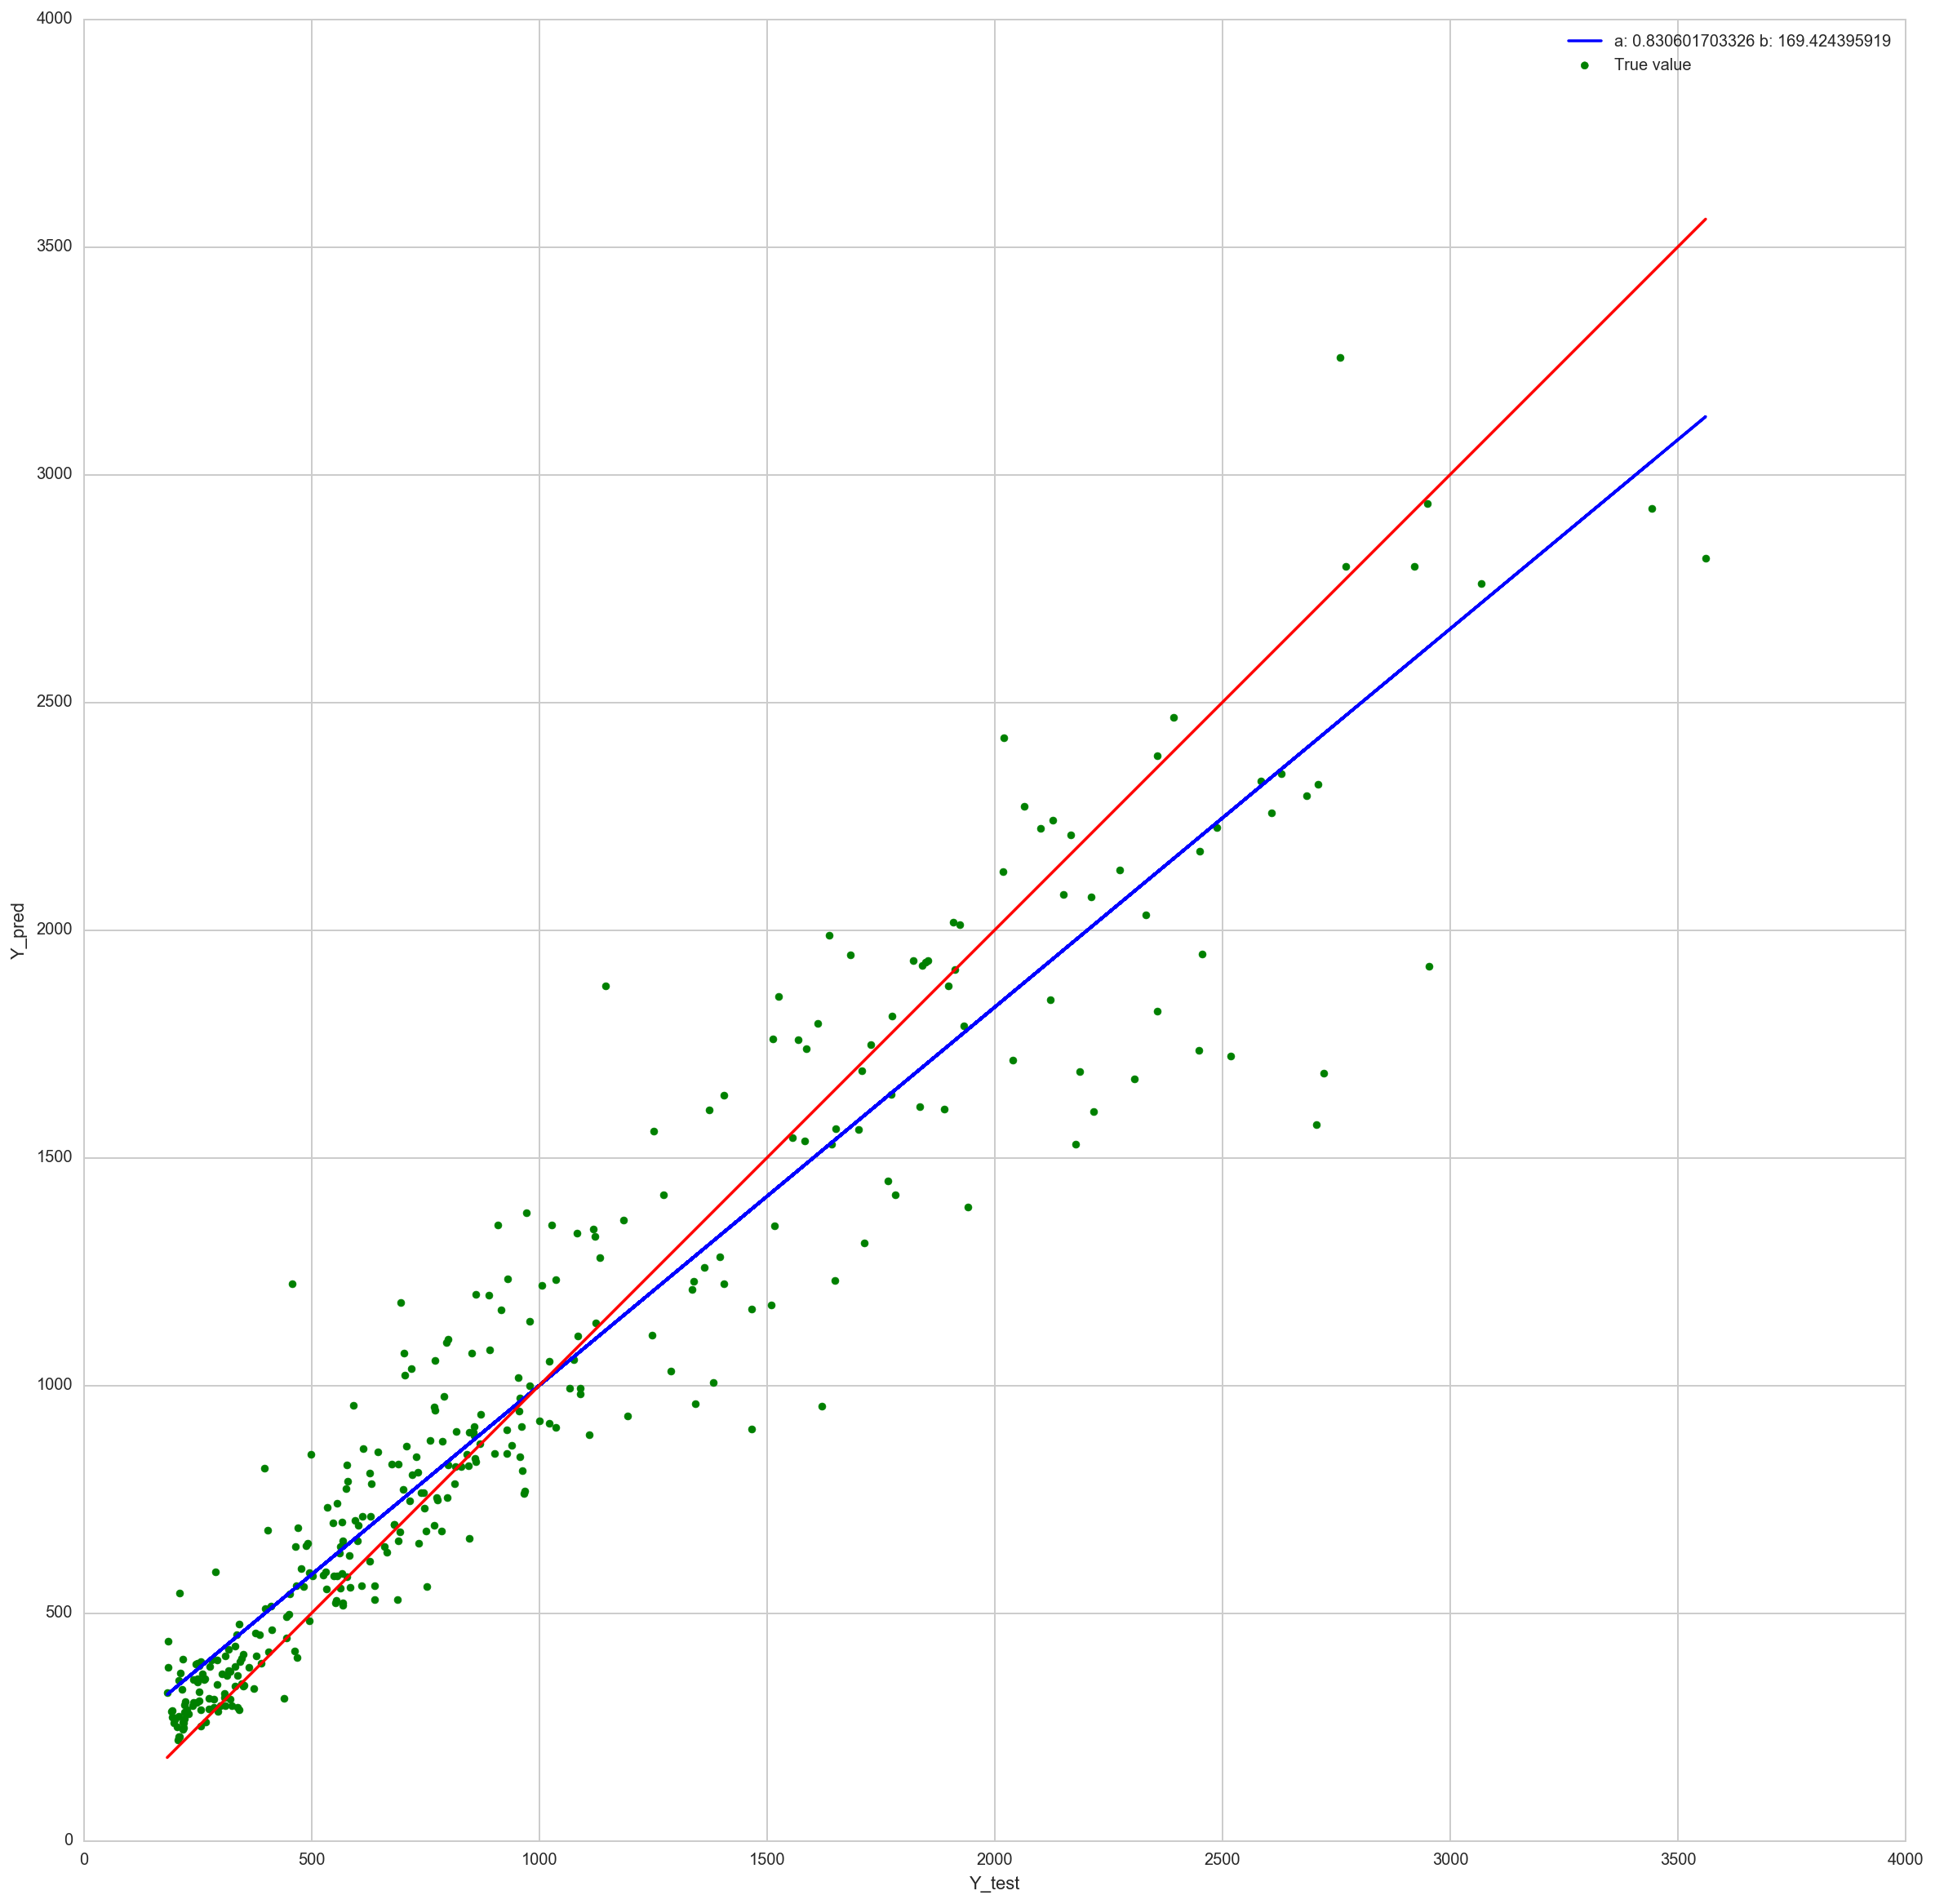

In [5]:
Y_pred = r.predict(r.random_forests(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.881722768903
Mean Squared Error:  61671.7780838
Median Absolute Error:  113.800861917
Explained Variance Error:  0.881722835255
a: 0.832690381371 b: 158.243258014


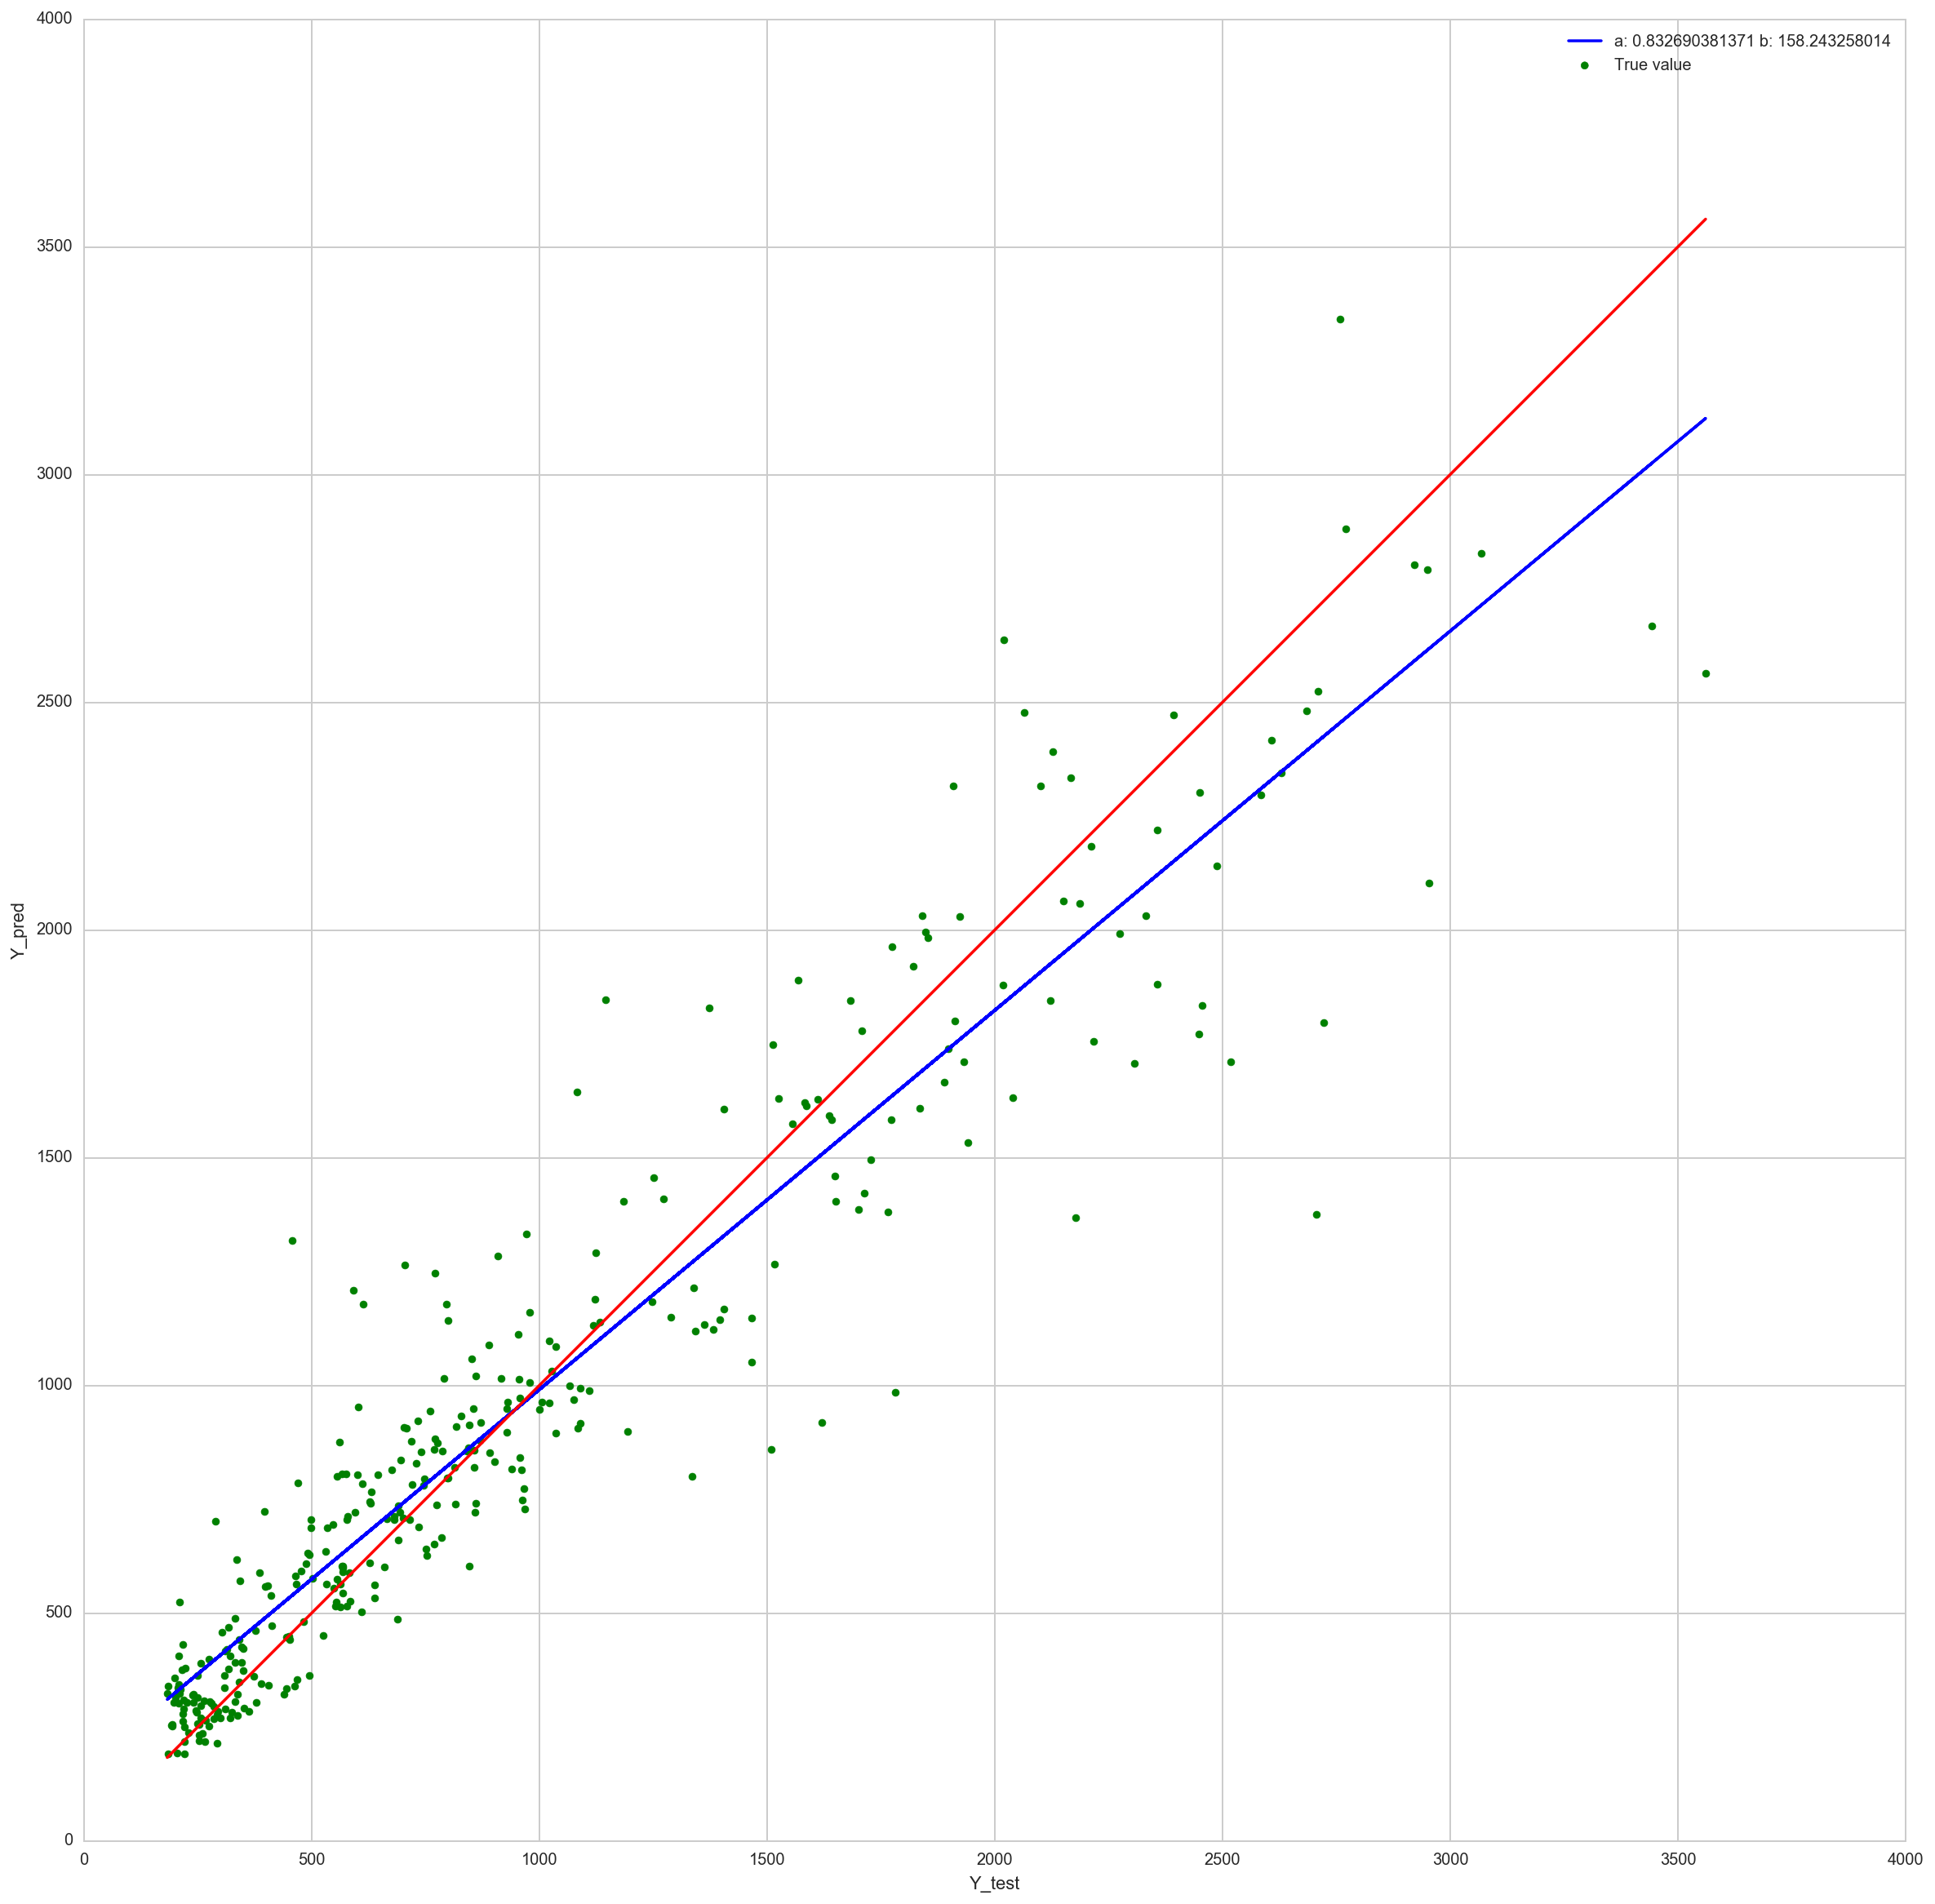

In [6]:
Y_pred = r.predict(r.xgb_trees(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.0972720343387
Mean Squared Error:  470697.853272
Median Absolute Error:  346.606225441
Explained Variance Error:  0.15540659987
a: 0.0845225134975 b: 690.746356915


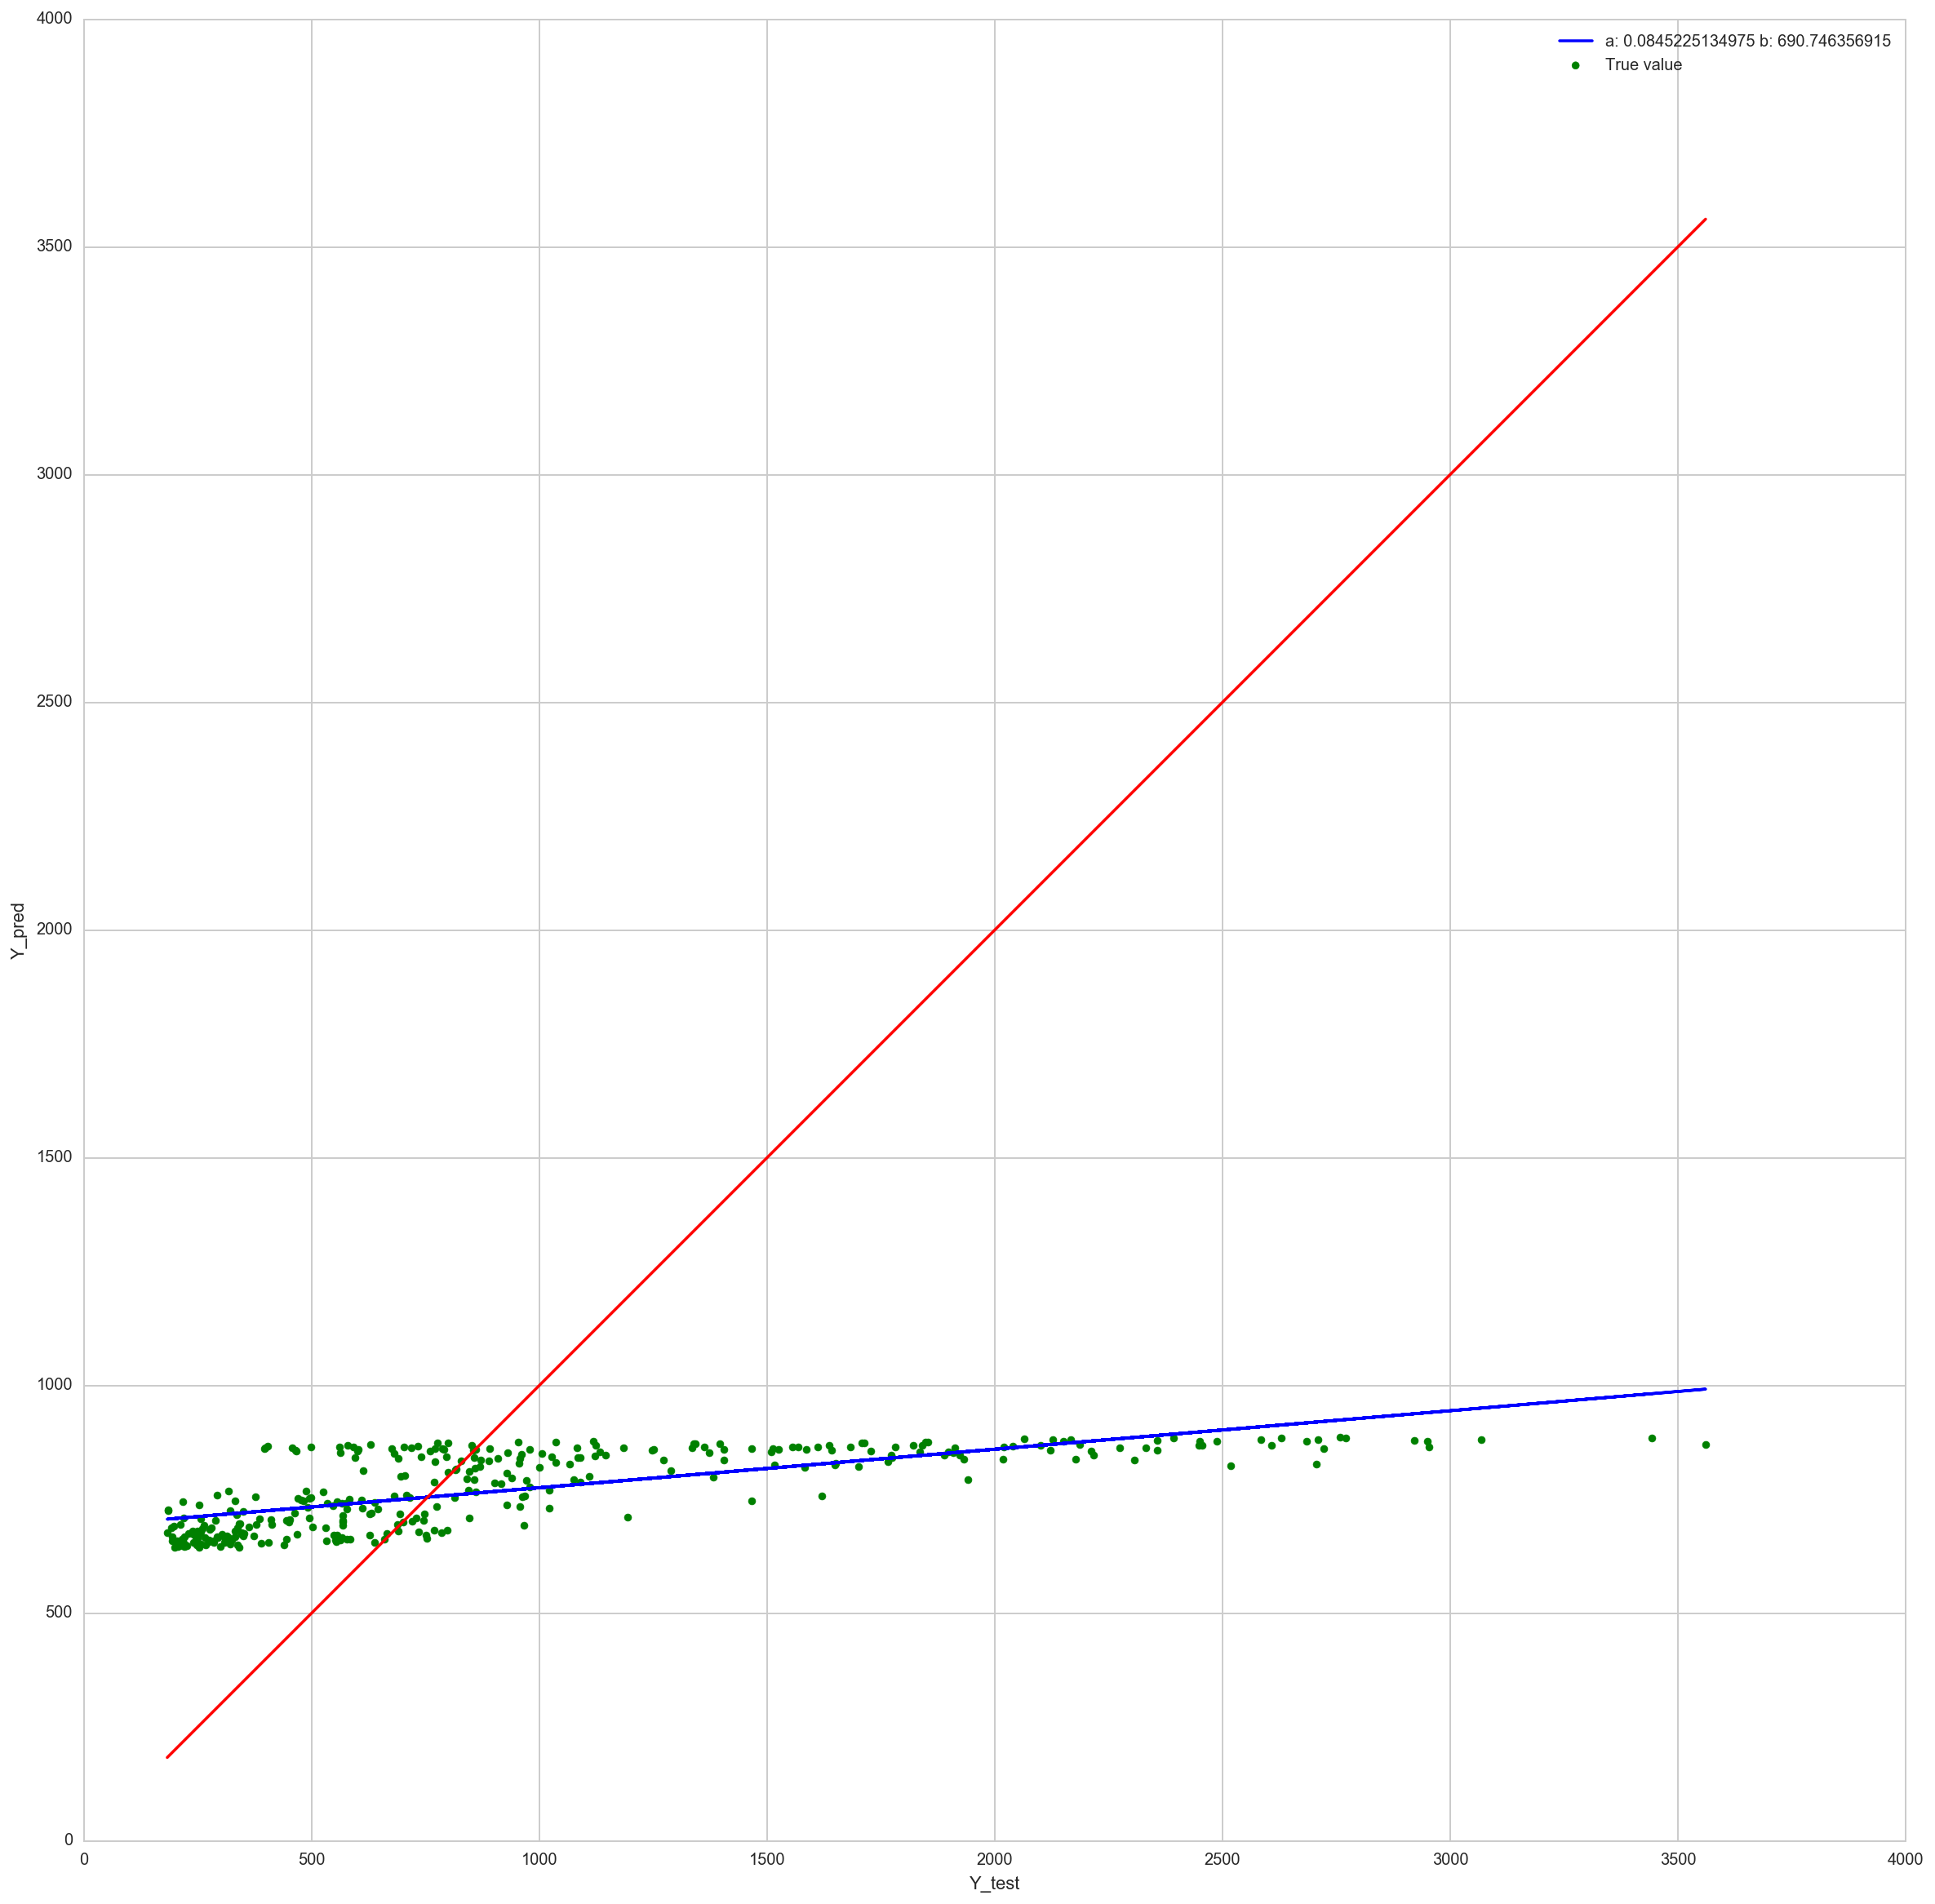

In [19]:
Y_pred = r.predict(r.svm(gamma=0.05), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

Step #100, epoch #14, avg. train loss: 367630.25000
Step #200, epoch #28, avg. train loss: 187058.90625
Step #300, epoch #42, avg. train loss: 151876.40625
Step #400, epoch #57, avg. train loss: 126419.40625
Step #500, epoch #71, avg. train loss: 106613.53125
Step #600, epoch #85, avg. train loss: 92842.92188
Step #700, epoch #100, avg. train loss: 81869.65625
Step #800, epoch #114, avg. train loss: 72650.82812
Step #900, epoch #128, avg. train loss: 64317.64844
Step #1000, epoch #142, avg. train loss: 59491.67969
Step #1100, epoch #157, avg. train loss: 53595.41016
Step #1200, epoch #171, avg. train loss: 48410.76562
Step #1300, epoch #185, avg. train loss: 43342.14453
Step #1400, epoch #200, avg. train loss: 39268.05078
Step #1500, epoch #214, avg. train loss: 36319.89453
Step #1600, epoch #228, avg. train loss: 33330.88672
Step #1700, epoch #242, avg. train loss: 31450.56055
Step #1800, epoch #257, avg. train loss: 29706.14453
Step #1900, epoch #271, avg. train loss: 27242.43945
Ste

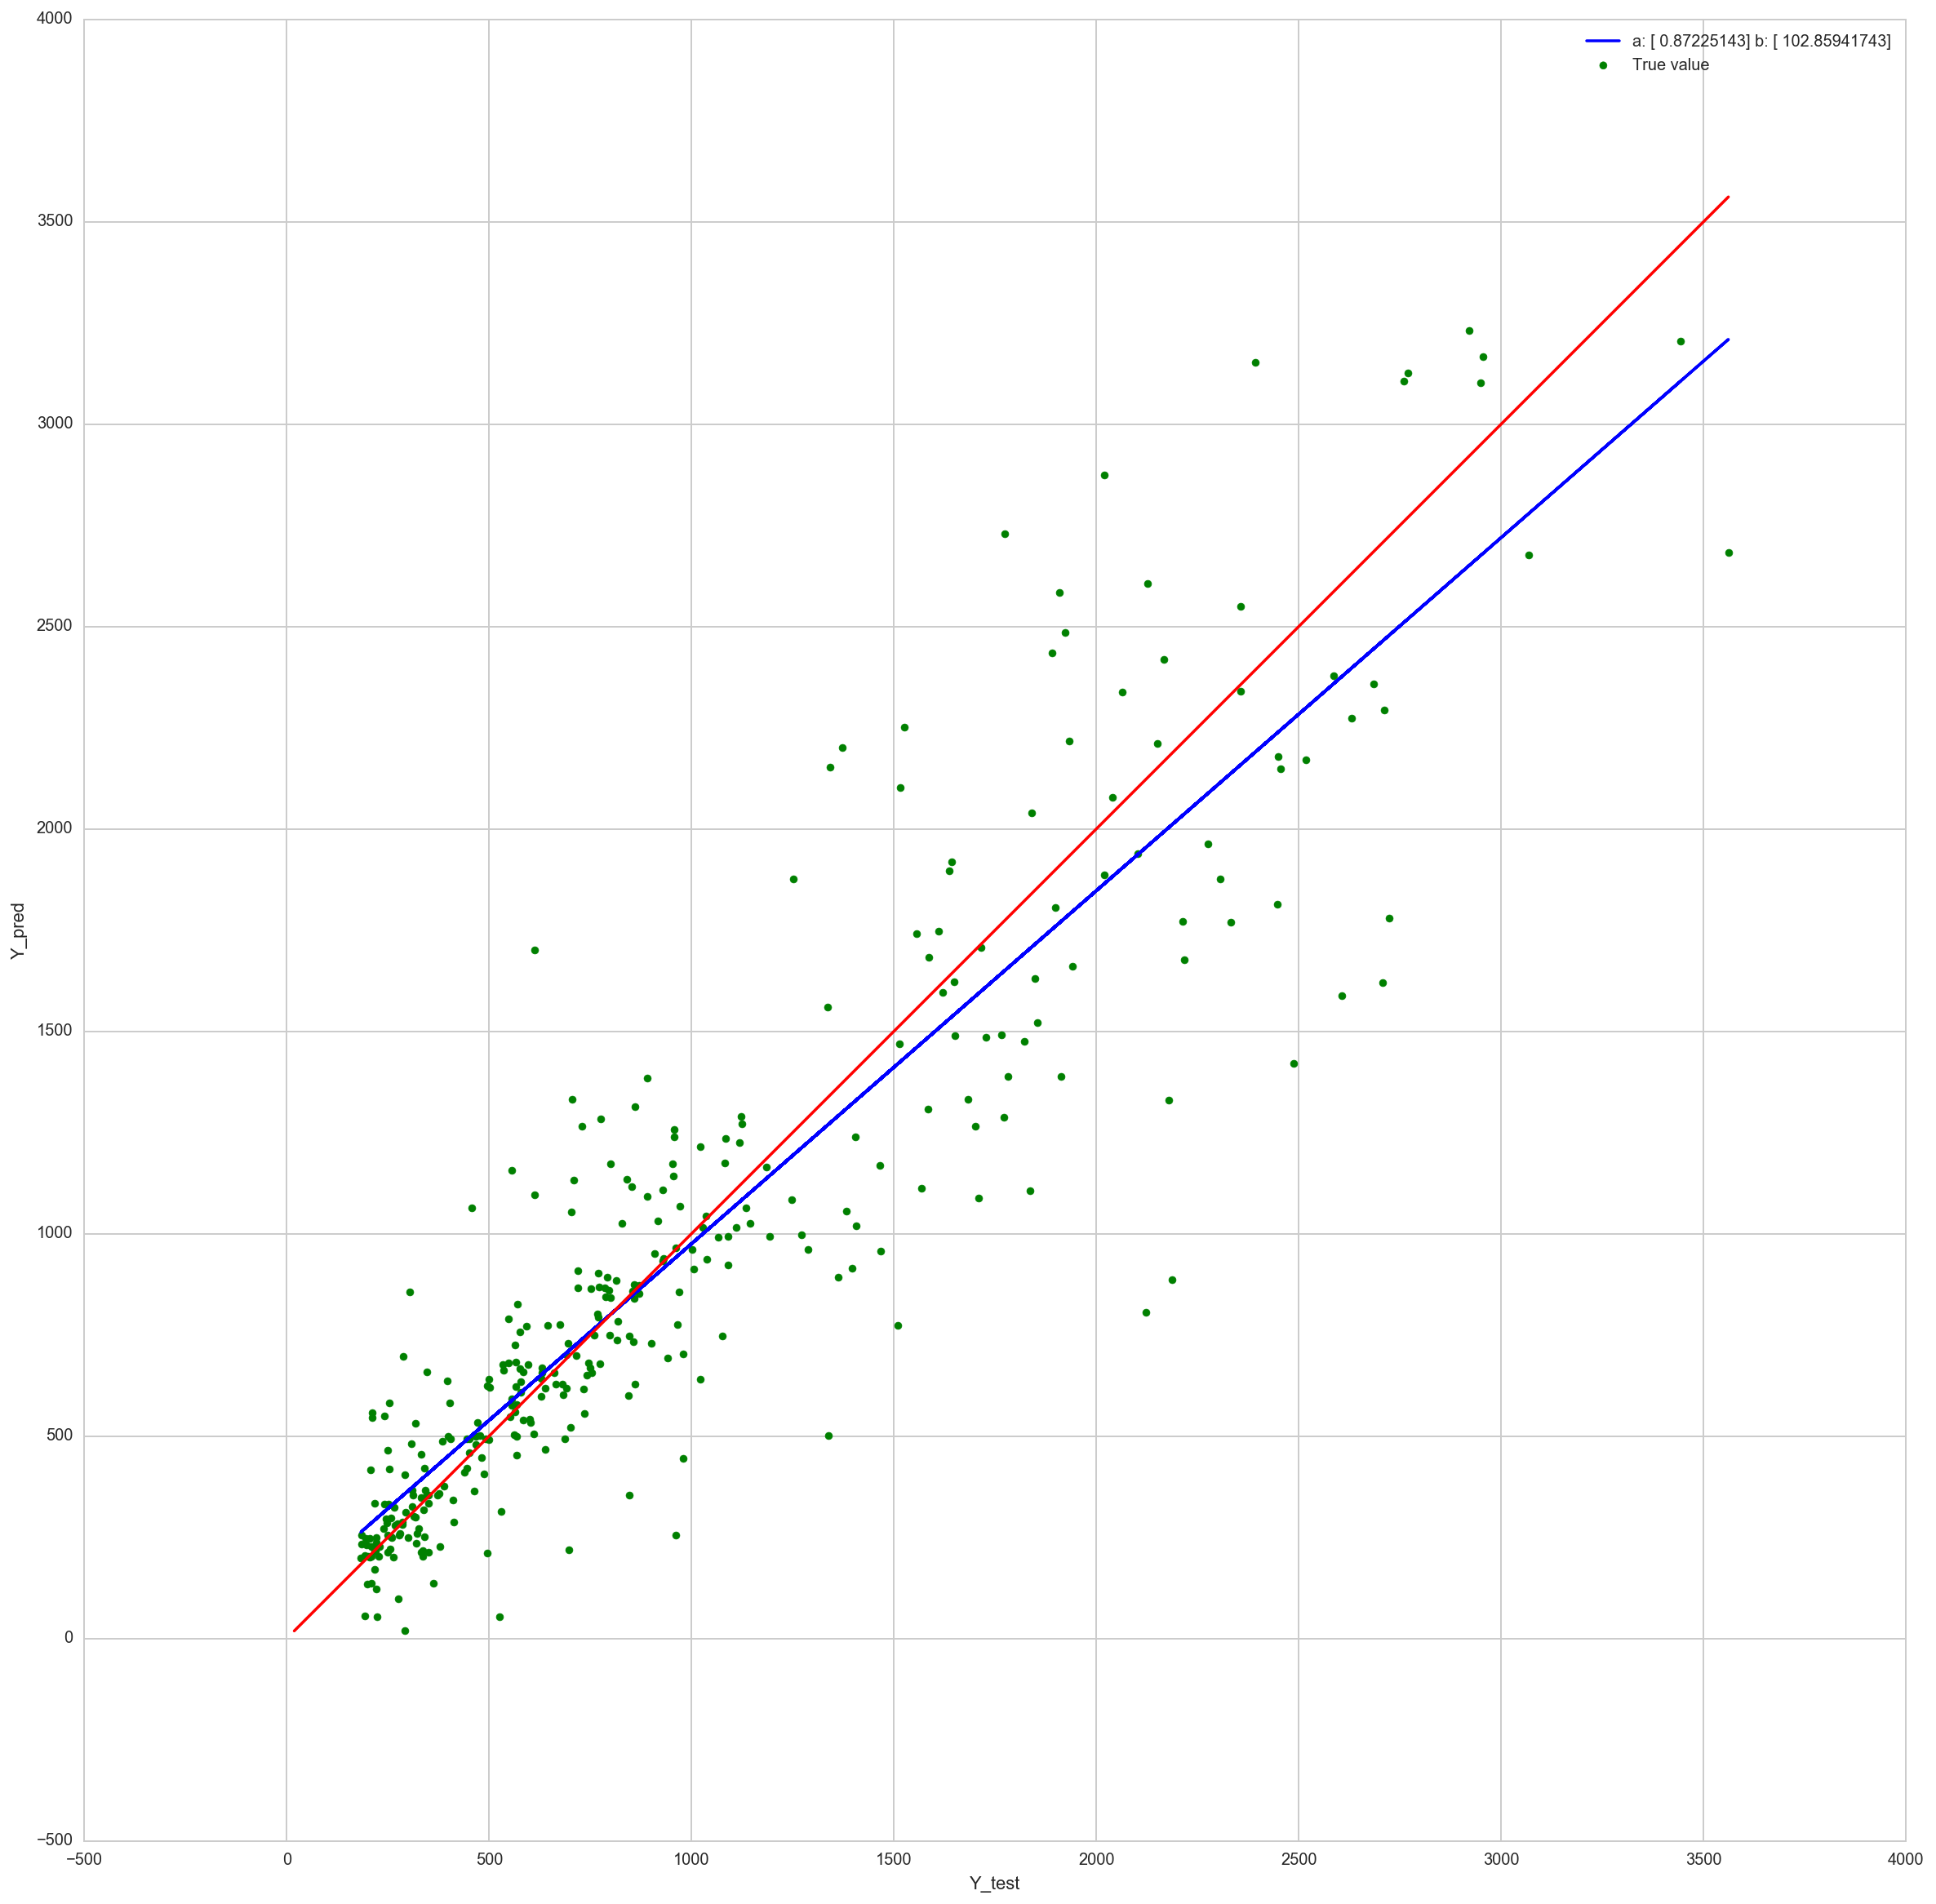

In [26]:
Y_pred = r.predict(r.dnn(nn_steps=40000, nn_lr=1., hidden_units=[50,50]), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)